# Lab-3


In [59]:
# Знайомство з нейромережами (Framework: TensorFlow2 + Keras, можно використовувати Pytorch)

# 1. Повнозв'язані нейронні мережі
# Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

# 2. Згорткові нейронні мережі
# Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

# 3. Рекурентні нейронні мережі
# Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

# Датасети для завдання № 2 (MNIST та CIFAR-10 не використовувати) можна брати тут:
# https://www.kaggle.com/tags/image-data
# Як звіт – робочий код в Jupyter notebook заливаєте на свій репозиторій. Лінк відправляєте як відповідь до цього завдання.
# Максимальний бал – 10, 6 за роботу + 4 захист.
# Deadline 17.12.22 (захист роботи можна проводити ще протягм 2х тижнів після дедлайна), після цього терміну максимальний бал зменшується на 1 кожні 2 тижні

# (!) Однакові або дуже схожі роботи прийматися не будуть.

# Опис завантажених даних


In [60]:
# Історія набору даних:

# Інсульт – це медичний стан, при якому поганий кровообіг у мозку викликає загибель клітин. Існує два основних типи інсульту: ішемічний, спричинений недостатністю кровотоку, і геморагічний, спричинений кровотечею. Обидва призводять до того, що частини мозку перестають функціонувати належним чином. Ознаки та симптоми інсульту можуть включати нездатність рухатися або відчувати одну сторону тіла, проблеми з розумінням або розмовою, запаморочення або втрату зору на одну сторону. Ознаки та симптоми часто з’являються незабаром після інсульту. Якщо симптоми тривають менше однієї-двох годин, інсульт є транзиторною ішемічною атакою (ТІА), яку також називають міні-інсультом. Геморагічний інсульт також може супроводжуватися сильним головним болем. Симптоми інсульту можуть бути постійними. Довгострокові ускладнення можуть включати пневмонію та втрату контролю над сечовим міхуром.

# Основним фактором ризику інсульту є високий артеріальний тиск. Інші фактори ризику включають високий рівень холестерину в крові, куріння, ожиріння, цукровий діабет, перенесену в минулому ТІА, термінальну стадію захворювання нирок і фібриляцію передсердь. Ішемічний інсульт зазвичай спричинений закупоркою кровоносної судини, хоча існують і менш поширені причини. Геморагічний інсульт викликається кровотечею безпосередньо в мозок або в простір між оболонками головного мозку. Через розрив аневризми головного мозку може виникнути кровотеча. Діагноз зазвичай базується на фізичному огляді та підтверджується медичними зображеннями, такими як КТ або МРТ. КТ може виключити кровотечу, але не обов’язково виключити ішемію, яка на ранній стадії зазвичай не виявляється на КТ. Інші тести, такі як електрокардіограма (ЕКГ) і аналізи крові, проводяться для визначення факторів ризику та виключення інших можливих причин. Низький рівень цукру в крові може викликати подібні симптоми.

# Профілактика включає зменшення факторів ризику, хірургічне втручання для відкриття артерій до мозку в тих, хто має проблемне звуження сонної артерії, і варфарин у людей з фібриляцією передсердь. Для профілактики лікарі можуть рекомендувати аспірин або статини. Інсульт або ТІА часто потребують невідкладної допомоги. Ішемічний інсульт, якщо його виявлено протягом трьох-чотирьох з половиною годин, можна вилікувати за допомогою ліків, які можуть розщепити тромб. Деякі геморагічні інсульти допомагають від хірургічного втручання. Лікування, спрямоване на відновлення втраченої функції, називається реабілітацією після інсульту та в ідеалі проводиться в інсультному відділенні; однак вони недоступні в більшості країн світу.

# Інформація про атрибути
# 1) стать: «Чоловік», «Жінка» або «Інше»
# 2) вік: вік пацієнта
# 3) гіпертонія: 0, якщо у пацієнта немає гіпертонії, 1, якщо у пацієнта гіпертонія
# 4) захворювання серця: 0, якщо у пацієнта немає захворювань серця, 1 якщо у пацієнта є захворювання серця 5) був коли-небудь одружений: «Ні» або «Так»
# 6) тип роботи: «діти», «Державний», «Ніколи не працював», «Приватний» або «самозайнятий» 7) Тип проживання: «Сільський» або «Міський»
# 8) середній рівень глюкози: середній рівень глюкози в крові
# 9) ІМТ: індекс маси тіла
# 10) статус_куріння: «раніше курив», «ніколи не курив», «курить» або "Невідомо"*
# 11) штрих:1, якщо у пацієнта був інсульт, або 0, якщо ні

# *Примітка: «Невідомо» в smoking_status означає, що інформація для цього пацієнта недоступна

# Посилання на dataset


In [61]:
# Brain Stroke Dataset:
# https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Poem Classification Dataset:
# https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp?select=Poem_classification+-+train_data.csv 

# Plastic on Sand Image Classification:
# https://www.kaggle.com/datasets/rogeriovaz/plastic-on-sand-image-classification

# Code


In [62]:
import re
import copy
import os
import PIL
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DATA_PATH = 'brain_stroke.csv'

dataset = pd.read_csv(DATA_PATH)
temp_detaset=copy.deepcopy(dataset)
display(dataset)

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [63]:
display(dataset.info())
display(dataset.describe())
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
gender_type_labels = dataset['gender'].unique()
ever_married_type_labels = dataset['ever_married'].unique()
work_type_labels = dataset['work_type'].unique()
resident_type_labels = dataset['Residence_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Gender type values:', gender_type_labels)
print('Ever married type values:', ever_married_type_labels)
print('Work type values:', work_type_labels)
print('Residence type values:', resident_type_labels)
print('Smoking status values:', smoking_status_labels)

Gender type values: ['Male' 'Female']
Ever married type values: ['Yes' 'No']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence type values: ['Urban' 'Rural']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [65]:
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

dataset.head()


gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       0  80.0             0              1             1          0   
2       1  49.0             0              0             1          0   
3       1  79.0             1              0             1          1   
4       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               0       1  
1               0             105.92  32.5               1       1  
2               1             171.23  34.4               2       1  
3               0             174.12  24.0               1       1  
4               1             186.21  29.0               0       1

# Fully connected neural networks



In [66]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = dataset['stroke'])


In [67]:
X_train =  np.array(X_train)
X_test = np.array(X_test)

In [68]:
data_normalization = preprocessing.Normalization()
data_normalization.adapt(X_train)

In [69]:
model_normalize =Sequential()
model_normalize.add(Dense(32,activation='sigmoid',input_dim=10))
model_normalize.add(Dense(128,activation='sigmoid'))
model_normalize.add(Dense(1,activation='sigmoid'))

model_normalize.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics=['accuracy'])

In [70]:
model_normalize.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10


/home/linux/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


100/100 [==============================] - 3s 8ms/step - loss: 0.0651 - accuracy: 0.9187 - val_loss: 0.0490 - val_accuracy: 0.9473
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 0.0455 - accuracy: 0.9511 - val_loss: 0.0483 - val_accuracy: 0.9473
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0451 - accuracy: 0.9511 - val_loss: 0.0478 - val_accuracy: 0.9473
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0447 - accuracy: 0.9511 - val_loss: 0.0471 - val_accuracy: 0.9473
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0448 - accuracy: 0.9511 - val_loss: 0.0467 - val_accuracy: 0.9473
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9511 - val_loss: 0.0465 - val_accuracy: 0.9473
Epoch 7/10
100/100 [==============================] - 1s 7ms/step - loss: 0.0443 - accuracy: 0.9511 - val_loss: 0.0465 - val_accuracy: 0.9473
Epoch 8/10
100/10

In [71]:
model_normalize.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9498


[0.04491037130355835, 0.949849545955658]

# Recurrent neural networks



In [72]:
texts = pd.read_csv("Poem_classification .csv")
texts.head()

Genre                                               Poem
0  Music  A woman walks by the bench I’m sitting onwith ...
1  Music  Because I am a boy, the untouchability of beau...
2  Music  Because today we did not leave this world,We n...
3  Music  Big Bend has been here, been here. Shouldn’t i...
4  Music  I put shells there, along the lip of the road....

In [73]:
print('Classes: ', texts['Genre'].unique())
print(texts.groupby(["Genre"]).count())

Classes:  ['Music' 'Death' 'Affection' 'Environment']
             Poem
Genre            
Affection     241
Death         244
Environment   252
Music         249


In [74]:
data = texts.replace({'Environment':0,'Music':1,'Death':2,'Affection':3})

In [75]:
stop_words = stopwords.words('english')

In [76]:
result = pd.concat([data['Genre'], data['Poem'].str.lower()], axis=1)
lower_case=pd.DataFrame(result)
display(lower_case)

Genre                                               Poem
0        1  a woman walks by the bench i’m sitting onwith ...
1        1  because i am a boy, the untouchability of beau...
2        1  because today we did not leave this world,we n...
3        1  big bend has been here, been here. shouldn’t i...
4        1  i put shells there, along the lip of the road....
..     ...                                                ...
981      0  why make so much of fragmentary blue in here a...
982      0  woman, i wish i didn't know your name. what co...
983      0  yonder to the kiosk, beside the creek, paddle ...
984      0  you come to fetch me from my work to-night whe...
985      0  you see them through water and glass, (both li...

[986 rows x 2 columns]

In [77]:
punctuation = string.punctuation+'’'+"—"+'“'+'”'+'–'+'1234567890'
remove_punctuation=[ ''.join([c if c not in punctuation else ' ' for c in text])  for text in lower_case['Poem']]
lower_case['Poem']=remove_punctuation
remove_punctuation=lower_case
display(remove_punctuation)

Genre                                               Poem
0        1  a woman walks by the bench i m sitting onwith ...
1        1  because i am a boy  the untouchability of beau...
2        1  because today we did not leave this world we n...
3        1  big bend has been here  been here  shouldn t i...
4        1  i put shells there  along the lip of the road ...
..     ...                                                ...
981      0  why make so much of fragmentary blue in here a...
982      0  woman  i wish i didn t know your name  what co...
983      0  yonder to the kiosk  beside the creek  paddle ...
984      0  you come to fetch me from my work to night whe...
985      0  you see them through water and glass   both li...

[986 rows x 2 columns]

In [78]:
remove_punctuation['Poem'] = remove_punctuation['Poem'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
remove_stopwords=remove_punctuation
display(remove_stopwords)

Genre                                               Poem
0        1  woman walks bench sitting onwith dog looks par...
1        1  boy untouchability beautyis subject already bo...
2        1  today leave world embody prominence within eve...
3        1  big bend say call mountains wall must river ne...
4        1  put shells along lip road bivalves last summer...
..     ...                                                ...
981      0  make much fragmentary blue bird butterfly flow...
982      0  woman wish know name could silence house front...
983      0  yonder kiosk beside creek paddle swift caque t...
984      0  come fetch work night supper table see leave b...
985      0  see water glass liquids air plenty liquid wate...

[986 rows x 2 columns]

In [79]:
normalize_data=remove_stopwords

In [80]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_words(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


normalize_data['Poem'] = normalize_data['Poem'].apply(lemmatize_words)

display(normalize_data)

Genre                                               Poem
0        1  woman walk bench sitting onwith dog look part ...
1        1  boy untouchability beautyis subject already bo...
2        1  today leave world embody prominence within eve...
3        1  big bend say call mountain wall must river nev...
4        1  put shell along lip road bivalve last summer d...
..     ...                                                ...
981      0  make much fragmentary blue bird butterfly flow...
982      0  woman wish know name could silence house front...
983      0  yonder kiosk beside creek paddle swift caque t...
984      0  come fetch work night supper table see leave b...
985      0  see water glass liquid air plenty liquid water...

[986 rows x 2 columns]

In [81]:

words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())

normalize_data['Poem'] = normalize_data['Poem'].apply(clean_sent)

display(normalize_data)

Genre                                               Poem
0        1  woman walk bench sitting dog look part lab par...
1        1  boy untouchability subject already book lap mi...
2        1  today leave world embody prominence within eve...
3        1  big bend say call mountain wall must river nev...
4        1  put shell along lip road bivalve last summer d...
..     ...                                                ...
981      0  make much fragmentary blue bird butterfly flow...
982      0  woman wish know name could silence house front...
983      0  yonder kiosk beside creek paddle swift thou br...
984      0  come fetch work night supper table see leave b...
985      0  see water glass liquid air plenty liquid water...

[986 rows x 2 columns]

In [82]:
X = normalize_data.drop(['Genre'], axis = 1)
y = normalize_data['Genre']

In [83]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
X=X.squeeze()
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = tf.keras.utils.pad_sequences(X)

In [84]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 120)           60000     
                                                                 
 lstm_2 (LSTM)               (None, 34, 64)            47360     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 4)                 260       
                                                                 
Total params: 140,644
Trainable params: 140,644
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
y=pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [86]:

model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
28/28 [==============================] - 15s 84ms/step - loss: 1.3843 - accuracy: 0.2717
Epoch 2/3
28/28 [==============================] - 2s 82ms/step - loss: 1.3265 - accuracy: 0.4442
Epoch 3/3
28/28 [==============================] - 2s 84ms/step - loss: 1.1172 - accuracy: 0.5197


In [87]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 3s 29ms/step - loss: 1.3192 - accuracy: 0.4040


[1.3191827535629272, 0.4040403962135315]

# Convolutional neural network


In [88]:
from os import listdir
from os.path import isfile, join

mypath_class_1='archive/Plastic_on_Sand/Clean/'
mypath_class_2='archive/Plastic_on_Sand/Dirt/'

mypath_class_1_list = [mypath_class_1+f for f in listdir(mypath_class_1) if isfile(join(mypath_class_1, f))]
mypath_class_2_list = [mypath_class_2+f for f in listdir(mypath_class_2) if isfile(join(mypath_class_2, f))]

all_files=mypath_class_1_list+mypath_class_2_list

In [89]:
data=[(file_path,1) if('Clean' in file_path) else ((file_path,0))  for file_path in all_files]

In [90]:
data=pd.DataFrame(data, columns=['path','labels'])

In [91]:
data

path  labels
0    archive/Plastic_on_Sand/Clean/clean 013.jpg       1
1    archive/Plastic_on_Sand/Clean/clean 042.jpg       1
2    archive/Plastic_on_Sand/Clean/clean 040.jpg       1
3    archive/Plastic_on_Sand/Clean/clean 049.jpg       1
4    archive/Plastic_on_Sand/Clean/clean 035.jpg       1
..                                           ...     ...
147    archive/Plastic_on_Sand/Dirt/dirt 018.jpg       0
148    archive/Plastic_on_Sand/Dirt/dirt 023.jpg       0
149    archive/Plastic_on_Sand/Dirt/dirt 050.jpg       0
150    archive/Plastic_on_Sand/Dirt/dirt 065.jpg       0
151    archive/Plastic_on_Sand/Dirt/dirt 038.jpg       0

[152 rows x 2 columns]

<AxesSubplot: xlabel='labels', ylabel='count'>

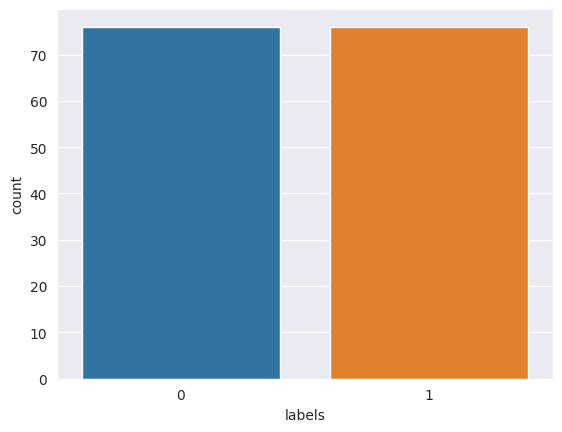

In [92]:
sns.set_style('darkgrid')
sns.countplot(x='labels',data=data)

In [93]:
from skimage.transform import rescale, resize, downscale_local_mean

def image_transform(paths):
    x = []
    for path in paths:
        image = io.imread(path)
        image_res = resize(image,  (150, 150))
        # np_pic = np.array(image_res, dtype=np.float32)/255
        x.append(image_res)
    return x


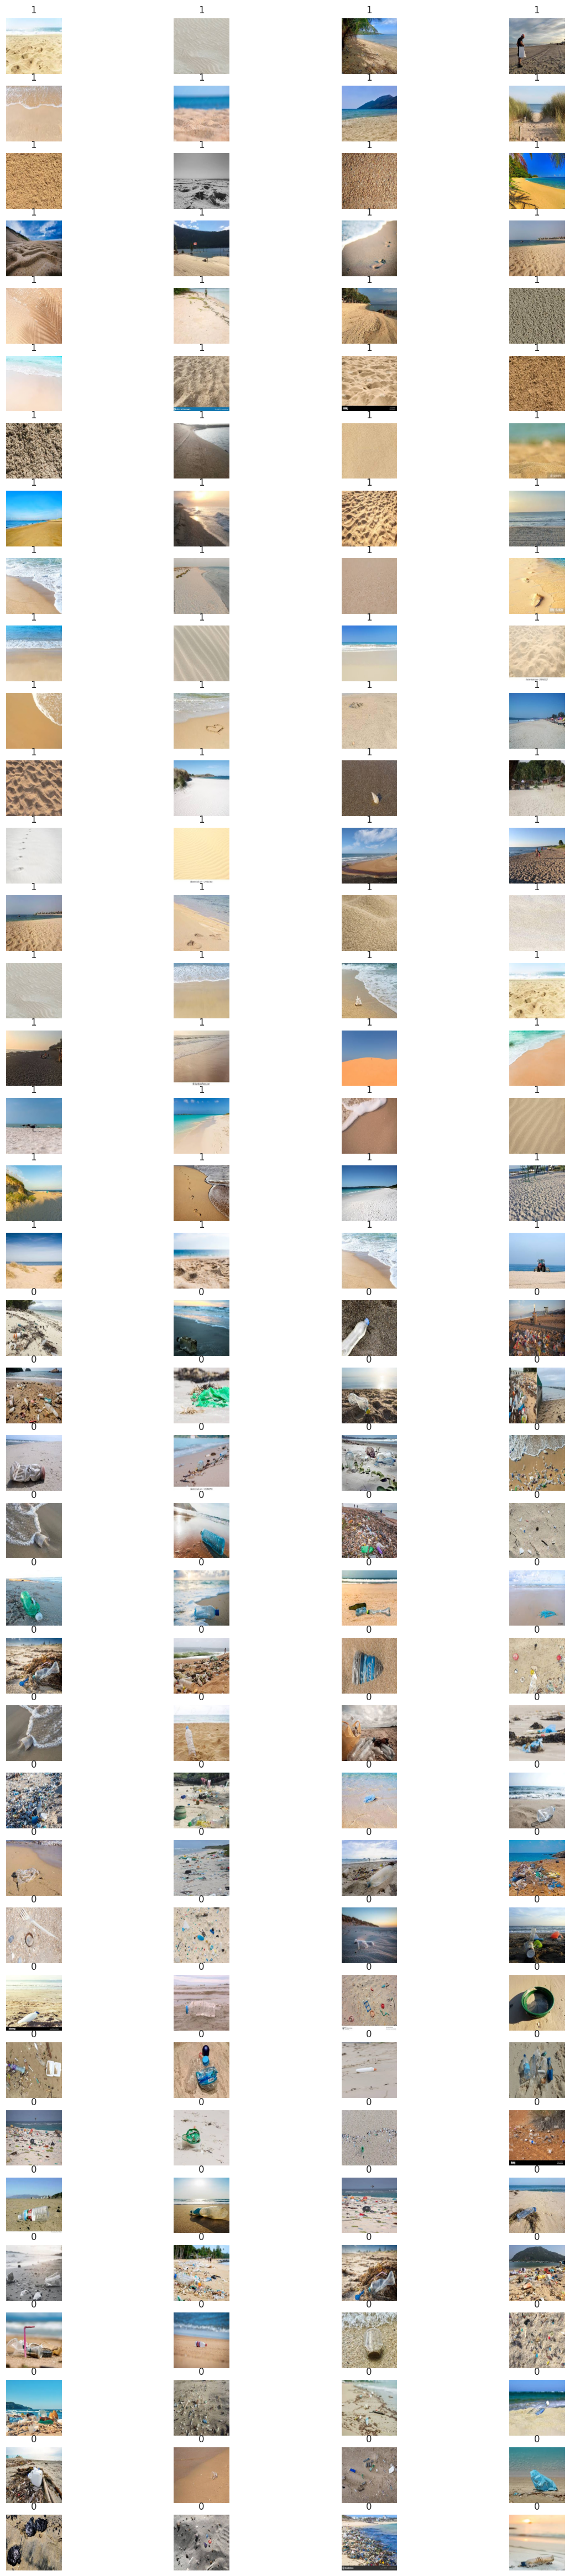

In [94]:
labels = data["labels"]
x=image_transform(all_files)

fig = plt.figure(figsize=(15,60))

rows = int(len(data)/4)

for row in range(rows):
    for column in range(4):
        i = row * 4 + column
        if i>len(data)-1:
            break                   
        ax = fig.add_subplot(rows, 4, i+1)
        ax.set_title(labels[i])     
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(x[i])


In [105]:
X = data.drop(['labels'], axis = 1)
y = data['labels']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 0)

In [97]:
from keras.layers import LSTM, Embedding, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Dropout(0.7))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam',loss = tf.losses.MeanSquaredError(),metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               22429824  
                                                      

In [107]:
X_train = image_transform(X_train['path'].tolist())


In [108]:
X_train

[array([[[0.52274983, 0.59725963, 0.62081992],
         [0.52743138, 0.60192589, 0.62930719],
         [0.54396829, 0.6121805 , 0.64278028],
         ...,
         [0.76813955, 0.76730446, 0.75788462],
         [0.77219639, 0.75416605, 0.73133118],
         [0.77954398, 0.75280212, 0.72127553]],
 
        [[0.53355457, 0.60805079, 0.63336374],
         [0.53929393, 0.61210371, 0.64459006],
         [0.55309716, 0.62235483, 0.6567456 ],
         ...,
         [0.76305353, 0.76223215, 0.75281916],
         [0.76382014, 0.74903281, 0.72770551],
         [0.76527643, 0.74510469, 0.71575999]],
 
        [[0.54633645, 0.6179622 , 0.65406533],
         [0.55414003, 0.62474889, 0.66390271],
         [0.56421889, 0.63480713, 0.67402281],
         ...,
         [0.7630974 , 0.76342687, 0.75346733],
         [0.74609435, 0.74092295, 0.72140747],
         [0.74786218, 0.73701031, 0.7159726 ]],
 
        ...,
 
        [[0.19962496, 0.18061267, 0.1620612 ],
         [0.16938515, 0.15376431, 0.13091

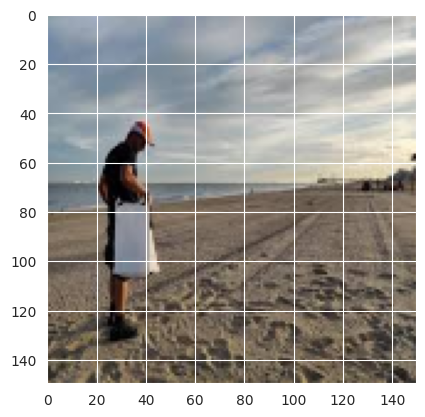

In [109]:
plt.imshow(X_train[0])

In [110]:
X_train=np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.int32)

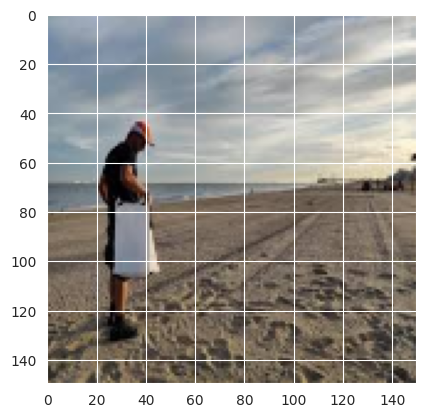

In [111]:
plt.imshow(X_train[0])

In [112]:
model.fit(X_train, y_train,epochs=3,batch_size=5,verbose=0)

In [113]:
X_test = image_transform(X_test['path'].tolist())
X_test=np.asarray(X_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.int32)

In [114]:
model.evaluate( X_test, y_test)

3/3 [==============================] - 2s 494ms/step - loss: 0.5263 - accuracy: 0.4737


[0.5263156890869141, 0.4736842215061188]

# Sources


https://keras.io/api/models/sequential/

https://www.projectpro.io/recipes/read-csv-file-tensorlow

https://www.tensorflow.org/tutorials/images/classification

https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews?select=amazon_alexa.tsv

https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/

https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true&scrollTo=Pv0XpgwJ7GlW